In [15]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import log10 as lg
from numpy import pi as pi
from scipy.interpolate import interp1d as sp_interp1d
from scipy.integrate import odeint
from scipy.integrate import ode
import warnings
import timeit
import scipy.optimize as opt
from matplotlib import cm
from astropy import constants as const
from astropy import units as u
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['ytick.major.size'] = 8
plt.rcParams['xtick.minor.size'] = 4
plt.rcParams['ytick.minor.size'] = 4
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True
plt.rcParams['axes.labelpad'] = 8.0
plt.rcParams['figure.constrained_layout.h_pad'] = 0
plt.rcParams['text.usetex'] = True
plt.rc('text', usetex=True)
plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.tick_params(axis='both', which='minor', labelsize=18)
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
import sys
import warnings
import timeit
import numpy as np
import scipy.optimize
from numpy import pi
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.integrate import ode as sp_ode

t0 = timeit.time.time()


plt.close()

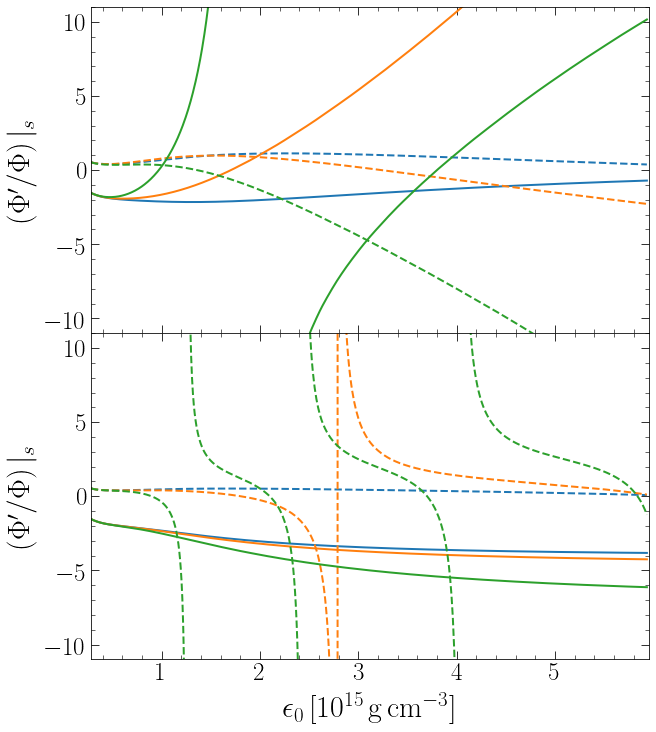

In [140]:
PI4 = 4.0 * pi
ka = 8.0 * pi
c = 29979245800.0  # cm/s
G = 6.67408e-8  # cm^3/g/s^2

MSUN = 1.98855e33  # g
KM = 1.0e5  # cm
mB = 1.660538921e-24  # g
E_NUCL = 2.0e14  # minimun energy density for NS core; g/cm^3

runit = 10.*KM # length to parametrize quantities

def rdiml(r):
    """ dimensionless mass """
    return r/runit    
def mdiml(m):
    """ dimensionless mass """
    return G*m/c**2/runit
def pdiml(p):
    """ dimensionless pressure """
    return G*p/c**4 * runit**2

colorset=['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']   


stdata1 = np.genfromtxt('stgb_linear_sol_data1.txt')
stdata2 = np.genfromtxt('stgb_linear_sol_data2.txt')
stdata3 = np.genfromtxt('stgb_linear_sol_data3.txt')
stdata4 = np.genfromtxt('stgb_linear_sol_data4.txt')
stdata5 = np.genfromtxt('stgb_linear_sol_data5.txt')
stdata6 = np.genfromtxt('stgb_linear_sol_data6.txt')

stn1 = len(stdata1)
#stn1, stn2, stn3, stn4, stn5 = len(strot1), len(strot2), len(strot3), len(strot4), len(strot5)
ntrim = 900

# ec, interior ph_r/ph, exterior ph_r/ph
d10, d11, d12 = stdata1[:, 0], stdata1[:, 1], stdata1[:, 2]
d20, d21, d22 = stdata2[:, 0], stdata2[:, 1], stdata2[:, 2]
d30, d31, d32 = stdata3[:, 0], stdata3[:, 1], stdata3[:, 2]
d40, d41, d42 = stdata4[:, 0], stdata4[:, 1], stdata4[:, 2]
d50, d51, d52 = stdata5[:, 0], stdata5[:, 1], stdata5[:, 2]
d60, d61, d62 = stdata6[:, 0], stdata6[:, 1], stdata6[:, 2]


fig, (ax1,ax2) = plt.subplots(2, 1,figsize=(10,12),sharex=True)
plt.subplots_adjust(hspace=0.0)






# ax1.set_xlabel(r'$\epsilon_0$', fontsize=20)
ax1.set_ylabel(r'$\left(\Phi^{\prime}/\Phi\right)|_s$', fontsize=30)
ax2.set_xlabel(r'$\epsilon_0\,[10^{15}\,\rm g\,\rm cm^{-3}]$', fontsize=30)
ax2.set_ylabel(r'$\left(\Phi^{\prime}/\Phi\right)|_s$', fontsize=30)


 
# ph_r/ph
ax1.set_ylim([-11, 11])
#ax1.set_xlim([0, 10])
ax1.plot( d40[0:ntrim]/10**15, d41[0:ntrim] , '--', color = colorset[0],linewidth=2)
ax1.plot( d40[0:ntrim]/10**15, d42[0:ntrim] , color = colorset[0],linewidth=2)
ax1.plot( d50[0:ntrim]/10**15, d51[0:ntrim] , '--', color = colorset[1],linewidth=2)
ax1.plot( d50[0:ntrim]/10**15, d52[0:ntrim] , color = colorset[1],linewidth=2)
ax1.plot( d60[0:ntrim]/10**15, d61[0:ntrim] , '--', color = colorset[2],linewidth=2)
# a=np.zeros(900)
# b=np.zeros(900)


# find the jump location
for i in range(1,ntrim):
    if abs(d62[i]-d62[i-1])>10:
        a=d60[i]
        b=i

ax1.plot( d60[0:b-1]/10**15, d62[0:b-1] , color = colorset[2],linewidth=2)
ax1.plot( d60[b+1:ntrim]/10**15, d62[b+1:ntrim] , color = colorset[2],linewidth=2)


ax2.set_ylim([-11, 11])
#ax1.set_xlim([0, 10])
ax2.plot( d10[0:ntrim]/10**15, d11[0:ntrim] , '--', color = colorset[0],linewidth=2)
ax2.plot( d10[0:ntrim]/10**15, d12[0:ntrim] , color = colorset[0],linewidth=2)
ax2.plot( d20[0:ntrim]/10**15, d21[0:ntrim] , '--', color = colorset[1],linewidth=2)
ax2.plot( d20[0:ntrim]/10**15, d22[0:ntrim] , color = colorset[1],linewidth=2)

# find the jump location
c=[]
d=[]
for i in range(1,ntrim):
    if abs(d31[i]-d31[i-1])>10:
        c.append(d31[i])
        d.append(i)
    
ax2.plot( d30[0:439]/10**15, d31[0:439] , '--', color = colorset[2],linewidth=2)
ax2.plot( d30[446:635]/10**15, d31[446:635] , '--', color = colorset[2],linewidth=2)
ax2.plot( d30[640:787]/10**15, d31[640:787] , '--', color = colorset[2],linewidth=2)
ax2.plot( d30[788:ntrim]/10**15, d31[788:ntrim] , '--', color = colorset[2],linewidth=2)
# ax2.plot( d30[0:ntrim]/10**15, d31[0:ntrim] , '--', color = colorset[2],linewidth=2)
ax2.plot( d30[0:ntrim]/10**15, d32[0:ntrim] , color = colorset[2],linewidth=2)





plt.xlim(min(d10)/10**15,d10[ntrim]/10**15)
ax1.minorticks_on()
ax2.minorticks_on()
# print( '\n *** STG_solver uses %.2f seconds\n' % (timeit.time.time() - t0))

plt.savefig("fig_lin1.pdf", format='pdf', bbox_inches="tight")
# plt.show()

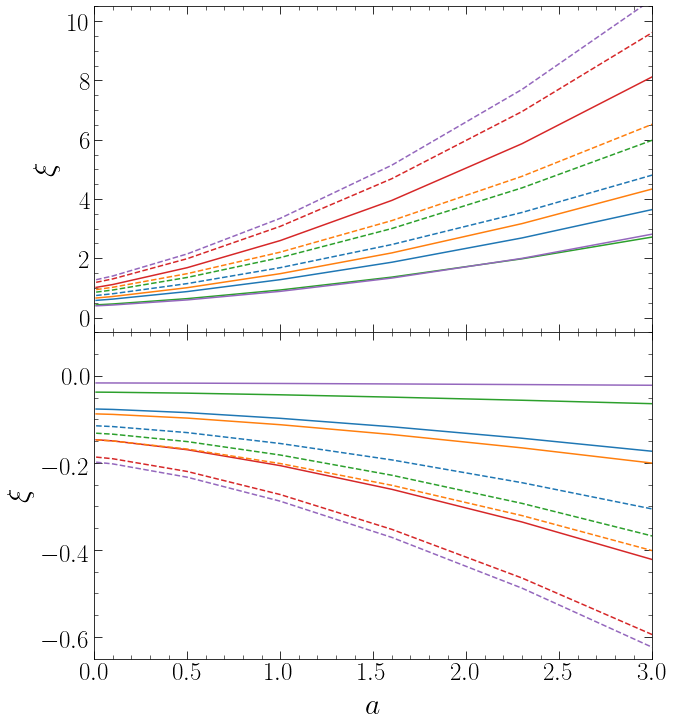

In [139]:
"""
test code: plot M-R
"""

import sys
import warnings
import timeit
import numpy as np
import scipy.optimize
from numpy import pi
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.integrate import ode as sp_ode

t0 = timeit.time.time()

PI4 = 4.0 * pi
ka = 8.0 * pi
c = 29979245800.0  # cm/s
G = 6.67408e-8  # cm^3/g/s^2

MSUN = 1.98855e33  # g
KM = 1.0e5  # cm
mB = 1.660538921e-24  # g
E_NUCL = 2.0e14  # minimun energy density for NS core; g/cm^3

runit = 10.*KM # length to parametrize quantities

def rdiml(r):
    """ dimensionless mass """
    return r/runit    
def mdiml(m):
    """ dimensionless mass """
    return G*m/c**2/runit
def pdiml(p):
    """ dimensionless pressure """
    return G*p/c**4 * runit**2

colorset=['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']   


stdata1 = np.genfromtxt('stgb_linear_v1_xia_data1.txt')
stdata2 = np.genfromtxt('stgb_linear_v1_xia_data2.txt')
stdata3 = np.genfromtxt('stgb_linear_v1_xia_data3.txt')
stdata4 = np.genfromtxt('stgb_linear_v1_xia_data4.txt')

stn1 = len(stdata1)
#stn1, stn2, stn3, stn4, stn5 = len(strot1), len(strot2), len(strot3), len(strot4), len(strot5)


# ec, interior ph_r/ph, exterior ph_r/ph
d10, d11, d12, d13, d14, d15 = stdata1[:, 0], stdata1[:, 1], stdata1[:, 2], stdata1[:, 3], stdata1[:, 4], stdata1[:, 5]
d20, d21, d22, d23, d24, d25 = stdata2[:, 0], stdata2[:, 1], stdata2[:, 2], stdata2[:, 3], stdata2[:, 4], stdata2[:, 5]
d30, d31, d32, d33, d34, d35 = stdata3[:, 0], stdata3[:, 1], stdata3[:, 2], stdata3[:, 3], stdata3[:, 4], stdata3[:, 5]
d40, d41, d42, d43, d44, d45 = stdata4[:, 0], stdata4[:, 1], stdata4[:, 2], stdata4[:, 3], stdata4[:, 4], stdata4[:, 5]

fig, (ax1,ax2) = plt.subplots(2, 1,figsize=(10,12),sharex=True)
plt.subplots_adjust(hspace=0.0)





# ax1.set_xlabel(r'$a$', fontsize=30)
ax1.set_ylabel(r'$\xi$', fontsize=30)
ax2.set_xlabel(r'$a$', fontsize=30)
ax2.set_ylabel(r'$\xi$', fontsize=30)

 
# ph_r/ph
#ax1.set_ylim([-10, 10])
ax2.plot( d10, d11 , color = colorset[0],linewidth=1.5)
ax2.plot( d10, d12 , color = colorset[1],linewidth=1.5)
ax2.plot( d10, d13 , color = colorset[2],linewidth=1.5)
ax2.plot( d10, d14 , color = colorset[3],linewidth=1.5)
ax2.plot( d10, d15 , color = colorset[4],linewidth=1.5)

ax2.plot( d20, d21 , '--', color = colorset[0],linewidth=1.5)
ax2.plot( d20, d22 , '--', color = colorset[1],linewidth=1.5)
ax2.plot( d20, d23 , '--', color = colorset[2],linewidth=1.5)
ax2.plot( d20, d24 , '--', color = colorset[3],linewidth=1.5)
ax2.plot( d20, d25 , '--', color = colorset[4],linewidth=1.5)

ax1.plot( d30, d31 , color = colorset[0],linewidth=1.5)
ax1.plot( d30, d32 , color = colorset[1],linewidth=1.5)
ax1.plot( d30, d33 , color = colorset[2],linewidth=1.5)
ax1.plot( d30, d34 , color = colorset[3],linewidth=1.5)
ax1.plot( d30, d35 , color = colorset[4],linewidth=1.5)

ax1.plot( d40, d41 , '--', color = colorset[0],linewidth=1.5)
ax1.plot( d40, d42 , '--', color = colorset[1],linewidth=1.5)
ax1.plot( d40, d43 , '--', color = colorset[2],linewidth=1.5)
ax1.plot( d40, d44 , '--', color = colorset[3],linewidth=1.5)
ax1.plot( d40, d45 , '--', color = colorset[4],linewidth=1.5)


ax2.set_ylim(-0.65,0.1)
ax1.set_ylim(-0.5,10.5)
plt.xlim(0,3)

ax1.minorticks_on()
ax2.minorticks_on()

plt.savefig("fig_lin2.pdf", format='pdf', bbox_inches="tight")
# print( '\n *** STG_solver uses %.2f seconds\n' % (timeit.time.time() - t0))

plt.show()

